In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
States=np.zeros((4,12))
count=0
for i in range(4):
    for j in range(12):
        States[i][j]=count
        count+=1

# SARSA

In [3]:
def run_SARSA(alpha,EPISODE):
    reward_list=np.zeros(EPISODE)
  
    #We have 48 states, 4 actions. Hence, Q is(48x4)
    Q= np.zeros((48,4))
    episode=[]


    for episodes in range(EPISODE): 
        
        T_reward=0
        action_mapper={0:'left', 1:'up', 2:'right', 3:'down'}
        e=0.1

        #action_list=['left','up','right','down']
        action_list=[0,1,2,3]

        state=36 #Start at 36th state
        action= np.random.choice(action_list, p=[0.25,0.25,0.25,0.25])#Initialise a starting action

        
        while(state<=36):


            if(action==0):
                if(state%12!=0):
                    next_state= state-1
                else:
                    next_state=state


            if(action==1):
                if(state>11):
                    next_state= state-12
                else:
                    next_state=state


            if(action==2):
                if(state%12 != 11):
                    next_state= state+1
                else:
                    next_state=state


            if(action==3):
                if(state<36):
                    next_state= state+12
                else:
                    next_state=state

            greedy_action= np.argmax(Q[next_state])
            P=[e/4, e/4, e/4, e/4]
            P[greedy_action]= 1-e+(e/4)
            next_action=np.random.choice(action_list,p=P)

            if(next_state<=36 or next_state==47):
                reward=-1
                T_reward= T_reward-1
    
            else:
                reward=-100
                T_reward= T_reward-100

            Q[state,action]= Q[state,action]+ (alpha*(reward + Q[next_state,next_action] - Q[state,action]))

            state=  next_state
            action= next_action
        reward_list[episodes]=T_reward
    
    return reward_list



In [4]:
EPISODE=500
rewards_SARSA=[0]*EPISODE
for runs in range(500):

    rewards_SARSA+=run_SARSA(0.1,EPISODE)

        

rewards_SARSA/=500

# Q-LEARNING

In [5]:
def run_QL(alpha, EPISODE):
    reward_list=np.zeros(EPISODE)
  
    #We have 48 states, 4 actions. Hence, Q is(48x4)
    Q= np.zeros((48,4))


    for episodes in range(EPISODE): 
        
        T_reward=0
        action_mapper={0:'left', 1:'up', 2:'right', 3:'down'}
        e=0.1

        #action_list=['left','up','right','down']
        action_list=[0,1,2,3]

        state=36 #Start at 36th state
        
        #Choose the starting action using e-greedy
        greedy_action= np.argmax(Q[state])
        P=[e/4,e/4,e/4,e/4]
        P[greedy_action]= (e/4)+(1-e)
        action= np.random.choice(action_list, p=P)#Initialise a starting action
        

        
        while(state<=36):
   
            if(action==0):
                if(state%12!=0):
                    next_state= state-1
                else:
                    next_state=state


            if(action==1):
                if(state>11):
                    next_state= state-12
                else:
                    next_state=state


            if(action==2):
                if(state%12 != 11):
                    next_state= state+1
                else:
                    next_state=state


            if(action==3):
                if(state<36):
                    next_state= state+12
                else:
                    next_state=state
                    
                    
                    
                    
            if(next_state<=36 or next_state==47):
                reward=-1
                T_reward= T_reward-1
    
            else:
                reward=-100
                T_reward= T_reward-100
                
                
            best_action= np.argmax(Q[next_state])
            Q[state,action]= Q[state,action]+ (alpha*(reward + Q[next_state,best_action] - Q[state,action]))

            greedy_action= np.argmax(Q[next_state])
            P=[e/4, e/4, e/4, e/4]
            P[greedy_action]= 1-e+(e/4)
            next_action=np.random.choice(action_list,p=P)

            
            state=  next_state
            action= next_action
        reward_list[episodes]=T_reward
    
    return reward_list



In [6]:
rewards_QL=[0]*500
for runs in range(500):

    rewards_QL+=run_QL(0.1,EPISODE)

        

rewards_QL/=500

# Plot the Figure

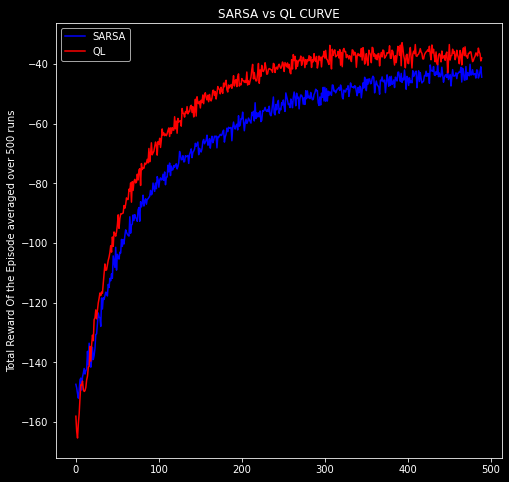

In [9]:
plt.style.use('dark_background')

plt.figure(0, figsize=(8,8))
plt.title('SARSA vs QL CURVE')
plt.plot(rewards_SARSA[10:], color='blue', label='SARSA')
plt.ylabel('Total Reward Of the Episode averaged over 500 runs')
plt.xlabel('Episode')
plt.plot(rewards_QL[10:], color='red', label='QL')
plt.legend()